<a href="https://colab.research.google.com/github/BlackCurrantDS/Mining-Rare-Association-Rules/blob/main/IRIS_Experiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split

from keras import models
from keras import layers
from tensorflow.keras.utils import to_categorical

In [2]:
# define the overfitting model

overfitting_network = models.Sequential() #512
overfitting_network.add(layers.Dense(512, activation='relu', input_shape=(4,)))
overfitting_network.add(layers.Dense(3, activation='softmax'))

# define the underfitting model

underfitting_network = models.Sequential() #512
underfitting_network.add(layers.Dense(512, activation='relu', input_shape=(4,)))
underfitting_network.add(layers.Dense(3, activation='softmax'))

In [3]:
# Compile the network
#
overfitting_network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

underfitting_network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [4]:
# Load the iris dataset
#
iris = datasets.load_iris()

df = pd.DataFrame(data = iris.data)

# add outcome variable
df['class'] = iris.target

X = np.matrix(df.loc[:, [0, 1, 2, 3]])
y = np.array(df['class'])
#
# Create training and test split
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, test_size=0.2)
#
# Create categorical labels
#
train_labels = to_categorical(y_train)
test_labels = to_categorical(y_test)

val_labels = to_categorical(y_val)

In [5]:
# Fit the overfitting neural network
#
history = overfitting_network.fit(X_train, train_labels, epochs=400, batch_size=40,validation_data=(X_val, val_labels))

Epoch 1/400
3/3 [==============================] - 1s 177ms/step - loss: 1.0297 - accuracy: 0.5521 - val_loss: 1.0350 - val_accuracy: 0.4583
Epoch 2/400
3/3 [==============================] - 0s 12ms/step - loss: 0.8080 - accuracy: 0.7188 - val_loss: 0.9826 - val_accuracy: 0.4583
Epoch 3/400
3/3 [==============================] - 0s 14ms/step - loss: 0.7401 - accuracy: 0.6875 - val_loss: 1.0229 - val_accuracy: 0.4583
Epoch 4/400
3/3 [==============================] - 0s 14ms/step - loss: 0.6850 - accuracy: 0.7292 - val_loss: 0.8505 - val_accuracy: 0.4583
Epoch 5/400
3/3 [==============================] - 0s 11ms/step - loss: 0.6261 - accuracy: 0.7188 - val_loss: 0.8214 - val_accuracy: 0.4583
Epoch 6/400
3/3 [==============================] - 0s 11ms/step - loss: 0.5857 - accuracy: 0.7188 - val_loss: 0.6691 - val_accuracy: 0.7500
Epoch 7/400
3/3 [==============================] - 0s 14ms/step - loss: 0.5732 - accuracy: 0.7604 - val_loss: 0.7166 - val_accuracy: 0.4583
Epoch 8/400
3/3 [==

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


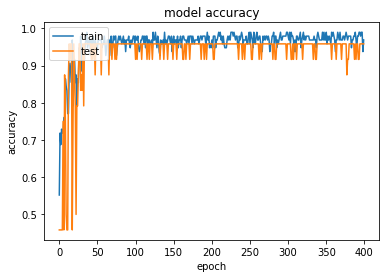

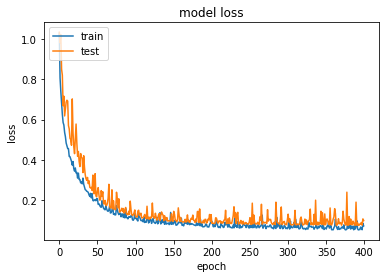

In [6]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [7]:
#
# Get the accuracy of test data set
#
test_loss, test_acc = overfitting_network.evaluate(X_test, test_labels)
#
# Print the test accura0cy
#
print('Test Accuracy: ', test_acc, '\nTest Loss: ', test_loss)

1/1 [==============================] - 0s 18ms/step - loss: 0.0773 - accuracy: 0.9333
Test Accuracy:  0.9333333373069763 
Test Loss:  0.0772576853632927


In [8]:
y_hats_overfitting = overfitting_network.predict(df.loc[:, [0, 1, 2, 3]])
classes_x_overfitting=np.argmax(y_hats_overfitting,axis=1)

In [9]:
overfitting_predictions = pd.DataFrame(classes_x_overfitting, columns=['overfitting_predictions'])
df = pd.concat([df, overfitting_predictions], axis =1)


In [10]:
#train underfitting
history = underfitting_network.fit(X_train, train_labels, epochs=15, batch_size=40,validation_data=(X_val, val_labels))

Epoch 1/15
3/3 [==============================] - 1s 81ms/step - loss: 1.0931 - accuracy: 0.4792 - val_loss: 1.0403 - val_accuracy: 0.4583
Epoch 2/15
3/3 [==============================] - 0s 11ms/step - loss: 0.8490 - accuracy: 0.7188 - val_loss: 0.8329 - val_accuracy: 0.7083
Epoch 3/15
3/3 [==============================] - 0s 10ms/step - loss: 0.7694 - accuracy: 0.7188 - val_loss: 0.8916 - val_accuracy: 0.4583
Epoch 4/15
3/3 [==============================] - 0s 11ms/step - loss: 0.6993 - accuracy: 0.8021 - val_loss: 0.8973 - val_accuracy: 0.4583
Epoch 5/15
3/3 [==============================] - 0s 12ms/step - loss: 0.6429 - accuracy: 0.7188 - val_loss: 0.8587 - val_accuracy: 0.4583
Epoch 6/15
3/3 [==============================] - 0s 12ms/step - loss: 0.6103 - accuracy: 0.7396 - val_loss: 0.8858 - val_accuracy: 0.4583
Epoch 7/15
3/3 [==============================] - 0s 12ms/step - loss: 0.5832 - accuracy: 0.7188 - val_loss: 0.7135 - val_accuracy: 0.7083
Epoch 8/15
3/3 [===========

In [11]:
y_hats_underfitting = underfitting_network.predict(df.loc[:, [0, 1, 2, 3]])
classes_x_underfitting=np.argmax(y_hats_underfitting,axis=1)

In [12]:
underfitting_predictions = pd.DataFrame(classes_x_underfitting, columns=['underfitting_predictions'])
df = pd.concat([df, underfitting_predictions], axis =1)

Binning the continous columns

In [13]:
df.describe()

,0,1,2,3,class,overfitting_predictions,underfitting_predictions
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.0000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000,0.9800,0.833333
std,0.828066,0.435866,1.765298,0.762238,0.819232,0.8066,0.689486
min,4.300000,2.000000,1.000000,0.100000,0.000000,0.0000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000,0.0000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000,1.0000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000,2.0000,1.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000,2.0000,2.000000


In [14]:
bins_0 = [0, 1, 2, 3, 4, 5, 6,7,8,9, 10,11, 12, 13, 14, 15, 16,17,18,19, 20]
bins_1 = [0, 1, 2, 3, 4]
bins_2 = [0, 1, 2, 3, 4, 5, 6,7]
bins_3 = [0, 1, 2, 3]
labels_0 = [0, 1, 2, 3, 4, 5, 6,7,8,9, 10,11, 12, 13, 14, 15, 16,17,18,19]
labels_1 = [0, 1, 2, 3]
labels_2 = [0, 1, 2, 3, 4, 5,6]
labels_3 = [0, 1, 2]
df['binned_0'] = pd.cut(iris.data[:,0], bins_0,labels=labels_0)
df['binned_1'] = pd.cut(iris.data[:,1], bins_1,labels=labels_1)
df['binned_2'] = pd.cut(iris.data[:,2], bins_2,labels=labels_2)
df['binned_3'] = pd.cut(iris.data[:,3], bins_3,labels=labels_3)
print(df)

       0    1    2    3  ...  binned_0  binned_1  binned_2 binned_3
0    5.1  3.5  1.4  0.2  ...         5         3         1        0
1    4.9  3.0  1.4  0.2  ...         4         2         1        0
2    4.7  3.2  1.3  0.2  ...         4         3         1        0
3    4.6  3.1  1.5  0.2  ...         4         3         1        0
4    5.0  3.6  1.4  0.2  ...         4         3         1        0
..   ...  ...  ...  ...  ...       ...       ...       ...      ...
145  6.7  3.0  5.2  2.3  ...         6         2         5        2
146  6.3  2.5  5.0  1.9  ...         6         2         4        1
147  6.5  3.0  5.2  2.0  ...         6         2         5        1
148  6.2  3.4  5.4  2.3  ...         6         3         5        2
149  5.9  3.0  5.1  1.8  ...         5         2         5        1

[150 rows x 11 columns]


In [15]:
#passing to different df to generate rare rules
df_pr = df[['class', 'binned_0', 'binned_1', 'binned_2', 'binned_3','underfitting_predictions', 'overfitting_predictions']]

In [16]:
df_pr['binned_1'] = df_pr['binned_1'].astype(str).str.replace('.0', '')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [17]:
df_pr.rename(columns={'binned_0': 'f1', 'binned_1': 'f2', 'binned_2': 'f3', 'binned_3': 'f4'}, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [18]:
df_pr.head(5)

,class,f1,f2,f3,f4,underfitting_predictions,overfitting_predictions
0,0,5,3,1,0,0,0
1,0,4,2,1,0,0,0
2,0,4,3,1,0,0,0
3,0,4,3,1,0,0,0
4,0,4,3,1,0,0,0


In [19]:
#chanigng data type
df_pr['f1'] = df_pr['f1'].astype(int)
df_pr['f2'] = df_pr['f2'].astype(float)
df_pr['f3'] = df_pr['f3'].astype(int)
df_pr['f4'] = df_pr['f4'].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [20]:
#filling missing value to numbers to spot it in rules
df_pr['f1'] = df_pr['f1'].fillna('99')
df_pr['f2'] = df_pr['f2'].fillna('99')
df_pr['f3'] = df_pr['f3'].fillna('99')
df_pr['f4'] = df_pr['f4'].fillna('99')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [21]:
df_pr['f2'] = df_pr['f2'].astype(str).str.replace('.0', '')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [22]:
#adding suffic to spot the class and column nae in rules
df_pr['class'] = df_pr['class'].astype(str)+'500'
df_pr['f1'] = df_pr['f1'].astype(str)+'900'
df_pr['f2'] = df_pr['f2'].astype(str)+'800'
df_pr['f3'] = df_pr['f3'].astype(str)+'700'
df_pr['f4'] = df_pr['f4'].astype(str)+'600'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [23]:
df_pr

,class,f1,f2,f3,f4,underfitting_predictions,overfitting_predictions
0,0500,5900,3800,1700,0600,0,0
1,0500,4900,2800,1700,0600,0,0
2,0500,4900,3800,1700,0600,0,0
3,0500,4900,3800,1700,0600,0,0
4,0500,4900,3800,1700,0600,0,0
...,...,...,...,...,...,...,...
145,2500,6900,2800,5700,2600,1,2
146,2500,6900,2800,4700,1600,1,2
147,2500,6900,2800,5700,1600,1,2
148,2500,6900,3800,5700,2600,2,2


In [24]:
#put it in csv file
df_pr[['class', 'f1', 'f2', 'f3', 'f4']].to_csv("iris_for_rare_rules.csv", index=False,sep =' ', header=None)

call RP-growth on it

In [25]:
pip install spmf

In [26]:
from spmf import Spmf
import pathlib

In [27]:
d = '/content/'

In [28]:
spmf = Spmf("RPGrowth_itemsets", input_filename="iris_for_rare_rules.csv",
            output_filename="output_iris_rpgrowth_rareitemsets.txt", arguments=[0.8, .01],spmf_bin_location_dir=d )

In [29]:
spmf.run()

>/content/spmf.jar
=============  RP-GROWTH 2.38 - STATS =============
 Transactions count from database : 150
 Max memory usage: 7.097358703613281 mb 
 Rare itemsets count : 327
 Total time ~ 26 ms



In [30]:
#processing rpp file

In [31]:
#removing sup
f = open('/content/output_iris_rpgrowth_rareitemsets.txt','r')
lst = []
for line in f:
  line  = line.split("#", 1)
  
  line  = line[0]
  lst.append(line)
f.close()
f = open('/content/output_processed.txt','w')
for line in lst:
    f.write(line+'\n')
f.close()

In [32]:
class_numbers = df_pr['class'].unique()
class_numbers

array(['0500', '1500', '2500'], dtype=object)

In [33]:
rp_growth_process = pd.read_csv("/content/output_processed.txt", header=None, names=["itemsets"],index_col=False)

In [34]:
temp_df = pd.concat([rp_growth_process[['itemsets']], rp_growth_process['itemsets'].str.split(' ', expand=True)], axis=1
                  )

In [35]:
temp_df=temp_df.drop('itemsets', axis=1)

In [36]:
temp_df.to_csv("temp_file.csv")

In [37]:
with open("/content/temp_file.csv", 'w') as f:
                for row in temp_df.itertuples(index=False):
                    #print(row)
                    ls = list(row)
                    ls = [x for x in ls if x]
                    try:
                      if '1500' or '2500' or '0500' in ls:
                            old_index = ls.index('1500') if '1500' in ls else (ls.index('2500') if '2500' in ls else ls.index('0500')) 
                            #print("old_index", old_index)
                            
                            ls.insert(0, ls.pop(old_index))
                            #print("after row", ls)
                            f.write(str(ls)+'\n')
                    except ValueError:
                      pass

In [38]:
import os
from ast import literal_eval

def parse_input(filename):
    with open(filename) as f:
        data = [set(literal_eval(line)) for line in f]
    return data

def compute_output(output_file, data, filter_value):
    ls = data
    index_to_pop=[]
    for set1 in ls:
      #print("set1", set1)
      for set2 in ls:
          if set1 is set2:
              # Do not try to compare a row with itself
              continue
          elif len(set(set1).difference(set(set2))) == 0:
                if set1 in ls:
                  index = ls.index(set1)
                  index_to_pop.append(index)

                  break
    print("Final index_to_pop",index_to_pop)              
    for index in sorted(index_to_pop, reverse=True):
        del ls[index]           
    print("Final list",ls)

    f = open('/content/superset.csv','w')
    for line in ls:
      print("length of line is", len(line))
      if len(line) >= filter_value:
        print("filtered line is",line)
        f.write(str(line)+'\n')
      else:
        pass
    f.close()

def filter_file(path, filter_value=3, in_name='temp_file.csv', out_name='filteredSets'):
    data = parse_input(os.path.join(path, in_name))
    print("data", data)
    output_filename = os.path.join(path, '{}{}'.format(out_name, filter_value))
    with open(output_filename, 'w') as out_file:
        compute_output(out_file, data, filter_value)

filter_file('/content')

data [{'2500', '6700', '2600'}, {'3800', '2500', '6700', '2600'}, {'2800', '2500', '6700', '2600'}, {'7900', '2500', '6700', '2600'}, {'2500', '6700', '2600', '3800', '7900'}, {'2500', '2800', '6700', '2600', '7900'}, {'7900', '2500', '6700'}, {'3800', '7900', '2500', '6700'}, {'7900', '2500', '1600', '6700'}, {'2500', '2800', '6700', '7900', '1600'}, {'2800', '2500', '7900', '6700'}, {'2500', '6700'}, {'3800', '2500', '6700'}, {'2500', '1600', '6700'}, {'2800', '2500', '1600', '6700'}, {'2800', '2500', '6700'}, {'5700', '7900', '2500'}, {'5700', '2800', '2500', '7900'}, {'5700', '7900', '2500', '1600'}, {'7900', '2500', '2600'}, {'3800', '7900', '2500', '2600'}, {'2800', '2500', '7900', '2600'}, {'7900', '2500'}, {'3800', '7900', '2500'}, {'3800', '7900', '2500', '1600'}, {'7900', '2500', '1600'}, {'2800', '2500', '1600', '7900'}, {'2800', '2500', '7900'}, {'3700', '1500', '4900'}, {'2800', '3700', '1500', '4900'}, {'600', '3700', '1500', '4900'}, {'600', '2800', '4900', '3700', '1500

In [39]:
with open('/content/superset.csv') as filein, open('/content/superset_final.csv','w') as fileout:
    for line in filein:
        line=line.replace("'","")
        line=line.replace("}","")
        line=line.replace("{","")
        line=line.replace(", "," ")
        fileout.write(line)

In [40]:
with open('/content/superset_final.csv') as filein, open('/content/superset_final_v1.csv','w') as fileout:
    for line in filein:
        line=line.replace("[","")
        line=line.replace("]","")
        fileout.write(line)

In [41]:
temp_df = pd.read_csv("/content/superset_final_v1.csv",header=None, names=["itemsets"],index_col=False)

In [42]:
temp_df = pd.concat([temp_df[['itemsets']], temp_df['itemsets'].str.split(' ', expand=True)], axis=1
                  )

In [43]:
temp_df=temp_df.drop('itemsets', axis=1)

In [44]:
temp_df.to_csv("temp_file.csv")

In [45]:
with open("/content/superset.csv", 'w') as f:
                for row in temp_df.itertuples(index=False):
                    #print(row)
                    ls = list(row)
                    ls = [x for x in ls if x]
                    try:
                      if '1500' or '2500' or '0500' in ls:
                            old_index = ls.index('1500') if '1500' in ls else (ls.index('2500') if '2500' in ls else ls.index('0500')) 
                            #print("old_index", old_index)
                            
                            ls.insert(0, ls.pop(old_index))
                            #print("after row", ls)
                            f.write(str(ls)+'\n')
                    except ValueError:
                      pass

In [46]:
with open('/content/superset.csv') as filein, open('/content/superset_final.csv','w') as fileout:
    for line in filein:
        line=line.replace("'","")
        line=line.replace("}","")
        line=line.replace("{","")
        line=line.replace(", "," ")
        fileout.write(line)

In [47]:
with open('/content/superset_final.csv') as filein, open('/content/superset_final_v1.csv','w') as fileout:
    for line in filein:
        line=line.replace("[","")
        line=line.replace("]","")
        fileout.write(line)

In [48]:
superset = pd.read_csv("/content/superset_final_v1.csv",header=None, names=["itemsets"],index_col=False)

In [49]:
superset_df = pd.concat([superset[['itemsets']], superset['itemsets'].str.split(' ', expand=True)], axis=1
                  )

In [50]:
superset_df = superset_df.loc[superset_df.iloc[:,1].isin(['0500','1500', '2500'])] #filtering rows

In [51]:
superset_df=superset_df.drop('itemsets', axis=1)

In [52]:
superset_df

,0,1,2,3,4
0,2500,6700,2600,3800,7900
1,2500,2800,6700,2600,7900
2,2500,2800,6700,7900,1600
3,2500,5700,2800,7900,None
4,2500,5700,7900,1600,None
5,2500,3800,7900,1600,None
6,1500,600,2800,4900,3700
7,1500,600,2800,5900,3700
8,1500,2800,5900,1600,3700
9,2500,5700,2800,2600,6900


In [53]:
superset_df.columns = ['a', 'b', 'c', 'd', 'e']

In [54]:
#concat @ to tempdf
for i,n in enumerate(superset_df.columns):
  
    superset_df[n] = '@' + superset_df[n].astype(str)

In [55]:
superset_df['a'].value_counts()

@2500    13
@1500     7
Name: a, dtype: int64

In [56]:
superset_df['rules'] = superset_df['b']+','+superset_df['c']+','+superset_df['d']+','+superset_df['e']

In [57]:
superset_df['pos'] = superset_df['rules'].str.find('@None')

In [58]:
superset_df['rules'] = superset_df.apply(lambda x: x['rules'][0:x['pos']],axis=1)
superset_df['rules'] = superset_df['rules']+">"+superset_df['a']
superset_df['rules'] = superset_df['rules'].str.replace(',>','>')

In [59]:
superset_df['rules'] = superset_df['rules'].str.replace('@','')

In [60]:
superset_df['rules']

0     6700,2600,3800,790>2500
1     2800,6700,2600,790>2500
2     2800,6700,7900,160>2500
3         5700,2800,7900>2500
4         5700,7900,1600>2500
5         3800,7900,1600>2500
6      600,2800,4900,370>1500
7      600,2800,5900,370>1500
8     2800,5900,1600,370>1500
9     5700,2800,2600,690>2500
10    5700,2600,3800,690>2500
11    5700,2800,6900,160>2500
12    5700,3800,6900,160>2500
13    5700,2800,5900,160>2500
14    2800,5900,4700,160>2500
15    2800,4700,6900,160>2500
16    4700,3800,6900,160>1500
17    2800,4700,6900,160>1500
18    5900,4700,3800,160>1500
19    2800,5900,4700,160>1500
Name: rules, dtype: object

In [61]:
superset_df['rules'].to_csv("iris_rare_rules.csv", header=None, index=False)

In [62]:
#refining predictions

In [63]:
df_pr

,class,f1,f2,f3,f4,underfitting_predictions,overfitting_predictions
0,0500,5900,3800,1700,0600,0,0
1,0500,4900,2800,1700,0600,0,0
2,0500,4900,3800,1700,0600,0,0
3,0500,4900,3800,1700,0600,0,0
4,0500,4900,3800,1700,0600,0,0
...,...,...,...,...,...,...,...
145,2500,6900,2800,5700,2600,1,2
146,2500,6900,2800,4700,1600,1,2
147,2500,6900,2800,5700,1600,1,2
148,2500,6900,3800,5700,2600,2,2


In [64]:
superset_df['b'] = superset_df['b'].str.replace('@','')
superset_df['c'] = superset_df['c'].str.replace('@','')
superset_df['d'] = superset_df['d'].str.replace('@','')
superset_df['e'] = superset_df['e'].str.replace('@','')

In [65]:
for row in superset_df[['b','c','d', 'e']].itertuples(index=False):
          ls1 = list(row)
          ls1 = [x for x in ls1 if x]
          set1 =ls1
          #print("set1", set1)
          for row in df_pr[['f1','f2', 'f3', 'f4']].itertuples(index=False):
                    ls = list(row)
                    ls = [x for x in ls if x]
                    set2 =ls
                    #print("set2", set2)
                    if set1 is set2:
                        # Do not try to compare a row with itself
                        continue
                    elif len(set(set1).difference(set(set2))) == 0:
                      df_pr['rules_class'] = superset_df['a']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


In [66]:
df_pr

,class,f1,f2,f3,f4,underfitting_predictions,overfitting_predictions,rules_class
0,0500,5900,3800,1700,0600,0,0,@2500
1,0500,4900,2800,1700,0600,0,0,@2500
2,0500,4900,3800,1700,0600,0,0,@2500
3,0500,4900,3800,1700,0600,0,0,@2500
4,0500,4900,3800,1700,0600,0,0,@2500
...,...,...,...,...,...,...,...,...
145,2500,6900,2800,5700,2600,1,2,NaN
146,2500,6900,2800,4700,1600,1,2,NaN
147,2500,6900,2800,5700,1600,1,2,NaN
148,2500,6900,3800,5700,2600,2,2,NaN


In [67]:
df_pr['rules_class'] = df_pr['rules_class'].str.replace('@','')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [68]:
#change only for a class
#df_pr['rules_class'].replace({"1500": np.nan}, inplace=True)
#df_pr['rules_class'].replace({"2500": np.nan}, inplace=True)

In [69]:
df_pr['rules_class'] = df_pr['rules_class'].fillna(df_pr['underfitting_predictions'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [70]:
df_pr['rules_class_final'] = df_pr['rules_class'].astype(str).str[0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [71]:
df_pr

,class,f1,f2,f3,f4,underfitting_predictions,overfitting_predictions,rules_class,rules_class_final
0,0500,5900,3800,1700,0600,0,0,2500,2
1,0500,4900,2800,1700,0600,0,0,2500,2
2,0500,4900,3800,1700,0600,0,0,2500,2
3,0500,4900,3800,1700,0600,0,0,2500,2
4,0500,4900,3800,1700,0600,0,0,2500,2
...,...,...,...,...,...,...,...,...,...
145,2500,6900,2800,5700,2600,1,2,1,1
146,2500,6900,2800,4700,1600,1,2,1,1
147,2500,6900,2800,5700,1600,1,2,1,1
148,2500,6900,3800,5700,2600,2,2,2,2


In [72]:
#change for the violet class
df_pr['rules_class_final'] = df_pr['rules_class_final'].apply(lambda x: df_pr['class'] if x == 0 else x)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [73]:
t_array = df_pr['rules_class_final'].astype(int).to_numpy() 

In [74]:
t_array

array([2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       1, 1, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1])

In [75]:
#plotting results

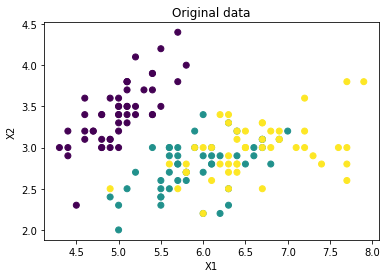

In [76]:
# Generate scatter plot for training data
plt.scatter(iris.data[:,0], iris.data[:,1],c=iris.target)
plt.title('Original data')
plt.xlabel('X1')
plt.ylabel('X2')
plt.savefig("original.png")
plt.show()

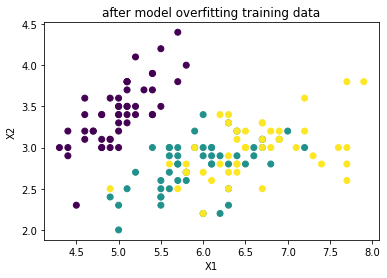

In [77]:
#overfitting
plt.scatter(iris.data[:,0], iris.data[:,1], c=classes_x_overfitting)
plt.title('after model overfitting training data')
plt.xlabel('X1')
plt.ylabel('X2')
plt.savefig("after_model_training.png")
plt.show()

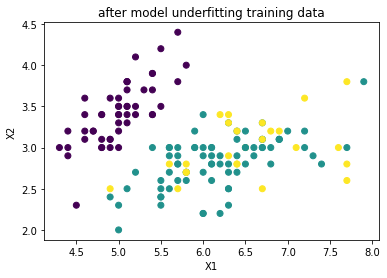

In [78]:
#underfitting
#plt.subplot(1, 2, 1)
plt.scatter(iris.data[:,0], iris.data[:,1], c=classes_x_underfitting)
plt.title('after model underfitting training data')
plt.xlabel('X1')
plt.ylabel('X2')
plt.savefig("after_model_training_underfitting.png")

plt.show()

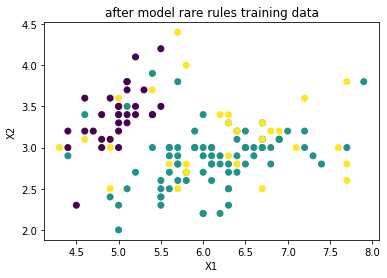

In [79]:
#rare rules
plt.scatter(iris.data[:,0], iris.data[:,1], c=t_array)
plt.title('after model rare rules training data')
plt.xlabel('X1')
plt.ylabel('X2')
plt.savefig("after_model_training_rare rules.png")
plt.show()